21BAI1780 Atharva Mankame

In [21]:
# Decision Tree Classification
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
# Importing the dataset
data = pd.read_csv('play.csv')
X=data.drop('play',axis=1)
y=data['play']
y

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: play, dtype: object

In [23]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

In [24]:
from sklearn.preprocessing import LabelEncoder
Numerics=LabelEncoder()

X['outlook_n']=Numerics.fit_transform(X['outlook'])
X['Temp_n']=Numerics.fit_transform(X['temp'])
X['Humidity_n']=Numerics.fit_transform(X['humidity'])
X['wind_n']=Numerics.fit_transform(X['wind'])
X

,day,outlook,temp,humidity,wind,outlook_n,Temp_n,Humidity_n,wind_n
0,D1,Sunny,Hot,High,Weak,2,1,0,1
1,D2,Sunny,Hot,High,Strong,2,1,0,0
2,D3,Overcast,Hot,High,Weak,0,1,0,1
3,D4,Rain,Mild,High,Weak,1,2,0,1
4,D5,Rain,Cool,Normal,Weak,1,0,1,1
5,D6,Rain,Cool,Normal,Strong,1,0,1,0
6,D7,Overcast,Cool,Normal,Strong,0,0,1,0
7,D8,Sunny,Mild,High,Weak,2,2,0,1
8,D9,Sunny,Cool,Normal,Weak,2,0,1,1
9,D10,Rain,Mild,Normal,Weak,1,2,1,1


In [25]:
X_n=X.drop(['day','outlook','temp','humidity','wind'],axis=1)
X_n

,outlook_n,Temp_n,Humidity_n,wind_n
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [26]:
# Training the Decision Tree Classification model on the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_n, y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [27]:
# Predicting a new result
print(classifier.predict([[1,0,0,1]]))

# Predicting the Test set results
y_pred = classifier.predict(X_n)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

['Yes']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [28]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y, y_pred)
print(cm)
print("Accuracy is:",accuracy_score(y, y_pred)*100,"%")

[[5 0]
 [0 9]]
Accuracy is: 100.0 %


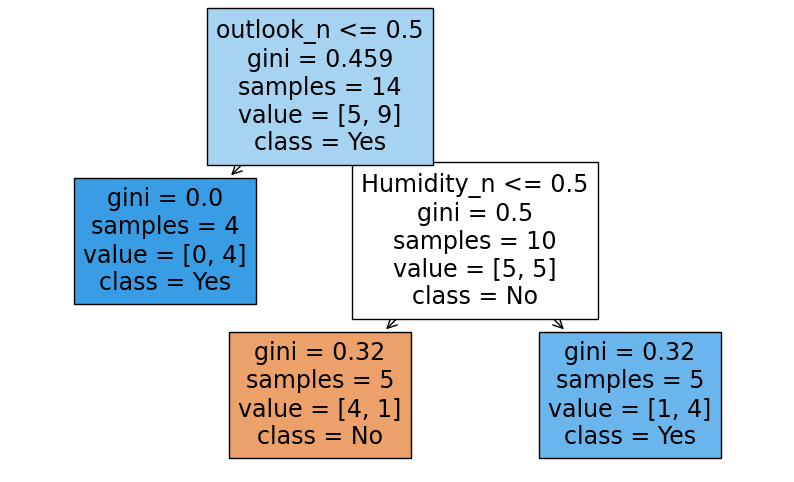

In [29]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dtc = DecisionTreeClassifier(max_depth=2)
dtc.fit(X_n, y)

# Visualize the decision tree
plt.figure(figsize=(10, 6))
plot_tree(dtc, filled=True, feature_names=X_n.columns, class_names=['No', 'Yes'])
plt.show()

In [30]:
from sklearn.metrics import classification_report
# Generate the confusion matrix and classification report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00         5
         Yes       1.00      1.00      1.00         9

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14

